<a href="https://colab.research.google.com/github/Harsaa-bot/GEN-AI/blob/main/Goal1GenAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 955.6 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.1-py3-none-any.whl (238 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246765 sha256=ab77746a239da25e5ccdbcbc898582021691e6600b8e37f73df8de434dee6b0a
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [2]:
import fasttext.util

# Download English vectors
fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('cc.en.300.bin')


In [5]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552451 sha256=127a118df3a32494b9e3a14c1276e83ee35351501e8786ad108f782d6f7927e4
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [6]:
from annoy import AnnoyIndex

# Initialize Annoy index with vector dimension (300) and 'angular' distance metric
vector_dim = 300
annoy_index = AnnoyIndex(vector_dim, 'angular')

# Add word vectors to the Annoy index
for i, word in enumerate(ft.get_words()):
    vector = ft.get_word_vector(word)
    annoy_index.add_item(i, vector)

# Build the Annoy index with 10 trees
annoy_index.build(10)


True

In [7]:
# Function to get similar words
def get_similar_words(word, n=10):
    word_index = ft.get_words().index(word)
    similar_indices = annoy_index.get_nns_by_item(word_index, n)
    similar_words = [ft.get_words()[i] for i in similar_indices]
    return similar_words

# Example: Get words similar to "computer"
similar_words = get_similar_words('computer')
print(similar_words)


['computer', 'computer.So', 'computer.I', 'computer.That', 'computer.Also', 'wordprocessing', 'MSWindows', 'scanner', 'wordprocessor', 'wordprocessors']


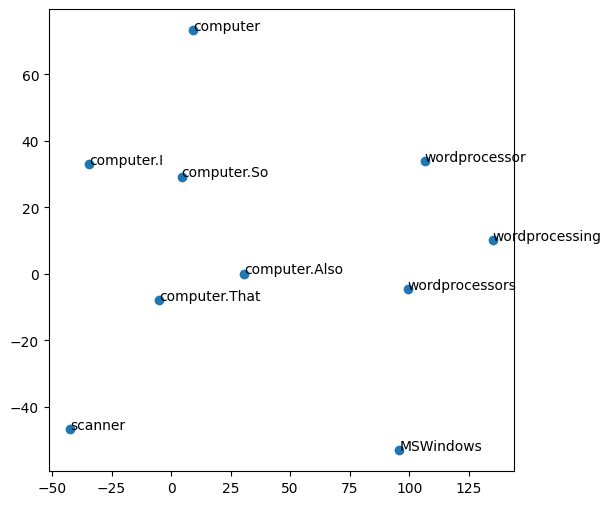

In [10]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np # Import numpy for array manipulation

# Function to plot similar words
def plot_similar_words(word, n=10):
    similar_words = get_similar_words(word, n)
    vectors = [ft.get_word_vector(w) for w in similar_words]

    # Convert the list of vectors to a NumPy array
    vectors = np.array(vectors)

    tsne = TSNE(n_components=2, random_state=0,perplexity=5)
    vectors_2d = tsne.fit_transform(vectors)

    plt.figure(figsize=(6, 6))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])

    for i, word in enumerate(similar_words):
        plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

    plt.show()

# Example: Plot words similar to "computer"
plot_similar_words('computer')

In [11]:
from gensim.models import Word2Vec

# Example dataset (list of sentences)
sentences = [
    ['this', 'is', 'a', 'sentence'],
    ['another', 'sentence', 'for', 'training'],
    # Add more sentences
]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec.model")


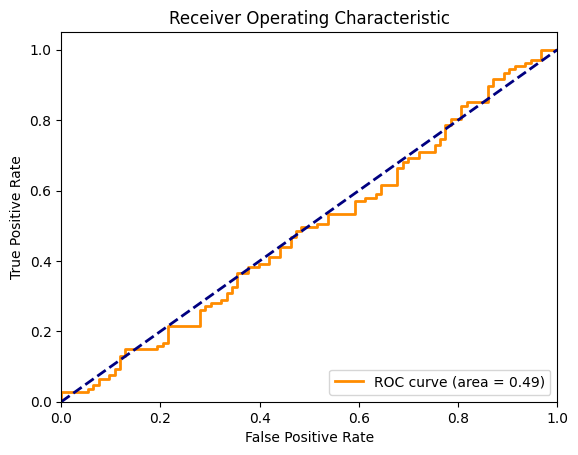

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

# Function to generate batches of data
def batch_generator(X, y, batch_size):
    num_samples = X.shape[0]
    for start in range(0, num_samples, batch_size):
        end = min(start + batch_size, num_samples)
        yield X[start:end], y[start:end]

# Example data (smaller for demonstration; use larger datasets as needed)
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.randint(0, 2, 1000)  # 1000 binary labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the logistic regression classifier
classifier = LogisticRegression()

# Train the classifier using batch processing
batch_size = 100
for X_batch, y_batch in batch_generator(X_train, y_train, batch_size):
    classifier.fit(X_batch, y_batch)

# Predict probabilities for the test set
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
